## 0. Install and Import Dependencies

In [1]:
# Install pytorch
#https://pytorch.org/get-started/locally/
# Install easyocr 
!pip install easyocr

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 1. Read in images or video

In [3]:
IMAGE_PATH = "D:/projects/projectws/Helmet-Detection-and-Number-Plate-Recognition-Using-YOLO-master/yolov5/runs/detect/exp7/crops/license_plate/Cars60.jpg"


In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[117, 0], [165, 0], [165, 13], [117, 13]], 'nd', 0.0032439820927571855),
 ([[29, 7], [101, 7], [101, 66], [29, 66]], '0S', 0.33855739982283106),
 ([[121, 5], [319, 5], [319, 66], [121, 66]], '802-HNI', 0.5713379173351124)]

## 2. Draw Results 

In [5]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

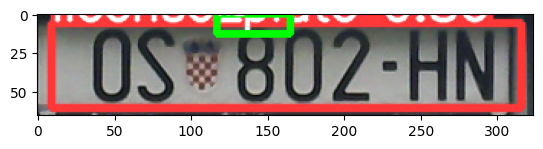

In [6]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 3. Handling Multiple Lines

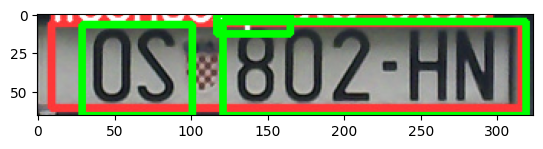

In [7]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()